### Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

- For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [1]:
# To get rid of those blocks of red warnings
import warnings
warnings.filterwarnings("ignore")

# Standard Imports
import numpy as np
from scipy import stats
import pandas as pd
from math import sqrt
import os
from sklearn.cluster import KMeans
import requests
import json

# Vis Imports
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Modeling Imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression, RFE
import statsmodels.api as sm


# Custom module imports
import acquire
import prepare

## store item demand data

In [2]:
df = acquire.df_to_csv()

In [3]:
df = prepare.store_prepare(df)

In [4]:
df.head(2)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Tuesday,10.92
2013-01-01,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,1,Tuesday,218.40


In [5]:
print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

Date Range: 2013-01-01 00:00:00 to 2017-12-31 00:00:00
Shape: (913000, 16)


In [6]:
train = df[:'2016'] # includes 2016
test = df['2017']


In [7]:
print('Train Shape:', train.shape)
print('Test Shape:', test.shape)

Train Shape: (730500, 16)
Test Shape: (182500, 16)


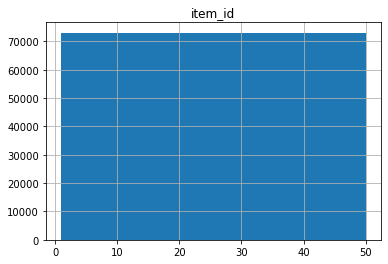

1     14610
33    14610
39    14610
31    14610
32    14610
28    14610
40    14610
29    14610
35    14610
38    14610
37    14610
36    14610
34    14610
12    14610
43    14610
21    14610
22    14610
42    14610
23    14610
20    14610
26    14610
41    14610
27    14610
25    14610
30    14610
6     14610
7     14610
9     14610
46    14610
13    14610
14    14610
45    14610
10    14610
47    14610
11    14610
44    14610
17    14610
18    14610
19    14610
16    14610
15    14610
3     14610
50    14610
49    14610
4     14610
5     14610
2     14610
8     14610
48    14610
24    14610
Name: item_id, dtype: int64
1     2.0
33    2.0
39    2.0
31    2.0
32    2.0
28    2.0
40    2.0
29    2.0
35    2.0
38    2.0
37    2.0
36    2.0
34    2.0
12    2.0
43    2.0
21    2.0
22    2.0
42    2.0
23    2.0
20    2.0
26    2.0
41    2.0
27    2.0
25    2.0
30    2.0
6     2.0
7     2.0
9     2.0
46    2.0
13    2.0
14    2.0
45    2.0
10    2.0
47    2.0
11    2.0
44    2.0
17    2.0
18

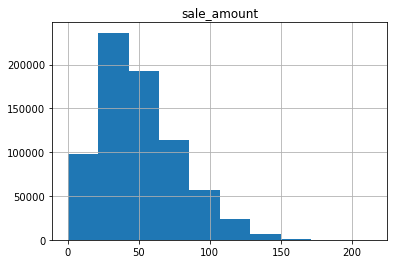

26.0     11881
30.0     11773
25.0     11710
27.0     11706
28.0     11701
         ...  
207.0        1
197.0        1
193.0        1
192.0        1
202.0        1
Name: sale_amount, Length: 203, dtype: int64
26.0     1.626420
30.0     1.611636
25.0     1.603012
27.0     1.602464
28.0     1.601780
           ...   
207.0    0.000137
197.0    0.000137
193.0    0.000137
192.0    0.000137
202.0    0.000137
Name: sale_amount, Length: 203, dtype: float64


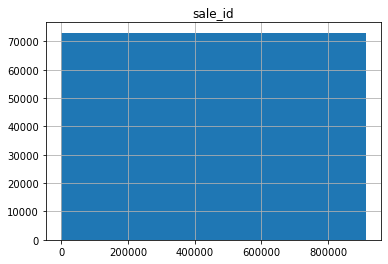

1         1
271223    1
884758    1
744156    1
483038    1
         ..
435076    1
488       1
508116    1
195870    1
589433    1
Name: sale_id, Length: 730500, dtype: int64
1         0.000137
271223    0.000137
884758    0.000137
744156    0.000137
483038    0.000137
            ...   
435076    0.000137
488       0.000137
508116    0.000137
195870    0.000137
589433    0.000137
Name: sale_id, Length: 730500, dtype: float64


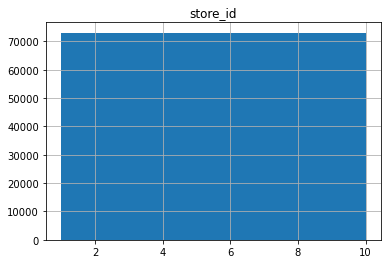

1     73050
7     73050
8     73050
9     73050
10    73050
6     73050
2     73050
5     73050
3     73050
4     73050
Name: store_id, dtype: int64
1     10.0
7     10.0
8     10.0
9     10.0
10    10.0
6     10.0
2     10.0
5     10.0
3     10.0
4     10.0
Name: store_id, dtype: float64


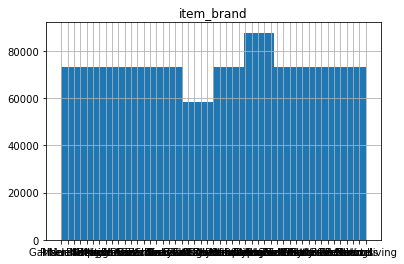

Usda Produce              29220
Riceland                  14610
Sally Hansen              14610
Munchies                  14610
Zhenas Gypsy Tea          14610
Barefoot                  14610
Amys                      14610
Heinz                     14610
Natures Way               14610
Sundown Naturals          14610
Nakano                    14610
Deerfields Gluten Free    14610
The First Years           14610
Halls                     14610
Ferrara                   14610
Doctors Best              14610
Betty Crocker             14610
Moms Best Naturals        14610
Reese                     14610
Triaminic                 14610
P.f. Changs               14610
Morton                    14610
Hood                      14610
Petmate                   14610
Twinings Of London        14610
Mueller                   14610
Van De Kamps              14610
Mama Marys                14610
Garnier Nutritioniste     14610
Pamprin                   14610
Kelloggs                  14610
Ahold   

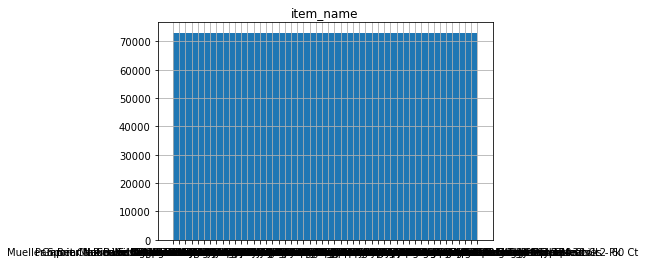

Riceland American Jazmine Rice                                                                       14610
Tomy The First Years Gumdrop Orthodontic Pacifiers 6m+ - 2ct                                         14610
Munchies Sandwich Crackers Cheddar Cheese On Golden Toast Crackers - 8 Pk                            14610
Zhenas Gypsy Tea Herbal Red Tea Sachets Fire Light Chai - 22 Ct                                      14610
Barefoot Pinot Grigio  187                                                                           14610
Guava                                                                                                14610
Amys Light & Lean Spaghetti Italiano                                                                 14610
Heinz Tomato Ketchup - 2 Ct                                                                          14610
Natures Way Forskohlii - 60 Ct                                                                       14610
Sundown Naturals Essential Electrolyt

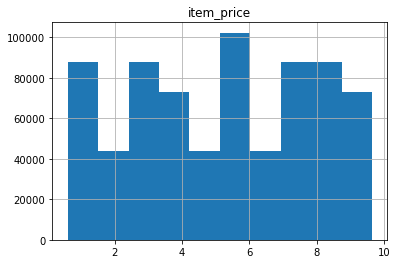

8.40    29220
5.62    29220
2.43    29220
3.45    14610
8.39    14610
9.02    14610
4.21    14610
0.68    14610
7.52    14610
0.60    14610
8.65    14610
5.19    14610
0.84    14610
6.93    14610
7.95    14610
6.52    14610
4.17    14610
8.09    14610
7.31    14610
2.97    14610
1.78    14610
0.98    14610
6.01    14610
9.59    14610
1.79    14610
9.64    14610
3.72    14610
4.65    14610
6.47    14610
7.54    14610
4.40    14610
3.17    14610
7.38    14610
3.93    14610
7.06    14610
1.16    14610
4.39    14610
0.74    14610
5.17    14610
9.11    14610
5.20    14610
9.54    14610
3.14    14610
2.61    14610
6.44    14610
1.68    14610
5.34    14610
Name: item_price, dtype: int64
8.40    4.0
5.62    4.0
2.43    4.0
3.45    2.0
8.39    2.0
9.02    2.0
4.21    2.0
0.68    2.0
7.52    2.0
0.60    2.0
8.65    2.0
5.19    2.0
0.84    2.0
6.93    2.0
7.95    2.0
6.52    2.0
4.17    2.0
8.09    2.0
7.31    2.0
2.97    2.0
1.78    2.0
0.98    2.0
6.01    2.0
9.59    2.0
1.79    2.0
9.64    2.0

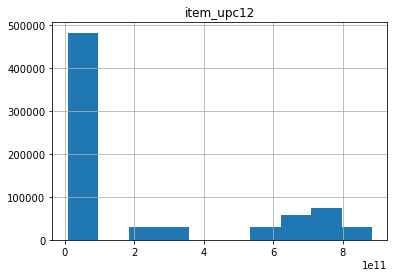

35200264013     14610
71463060078     14610
28400029254     14610
652790100226    14610
8500004528      14610
719175900007    14610
42272008063     14610
13000001038     14610
33674100066     14610
30768540548     14610
73575295003     14610
610358991525    14610
312546628694    14610
74676640211     14610
71403000379     14610
753950001954    14610
16000288829     14610
883978129115    14610
70670009658     14610
204040000000    14610
300436344045    14610
31000670016     14610
24600017008     14610
44100117428     14610
723503568678    14610
74170388732     14610
70177154004     14610
19600923015     14610
35457770664     14610
603084234561    14610
41167300121     14610
38000542237     14610
688267141676    14610
884623708976    14610
657622604842    14610
26000001403     14610
88313590791     14610
21200725340     14610
41520035646     14610
792850014008    14610
79400847201     14610
23923330139     14610
47445919221     14610
62338879772     14610
208528800007    14610
7592831000

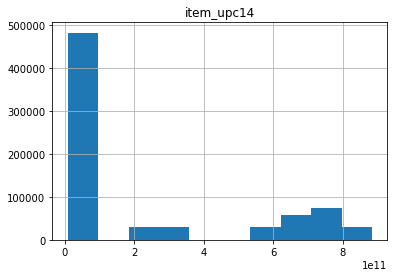

35200264013     14610
71463060078     14610
28400029254     14610
652790100226    14610
8500004528      14610
719175900007    14610
42272008063     14610
13000001038     14610
33674100066     14610
30768540548     14610
73575295003     14610
610358991525    14610
312546628694    14610
74676640211     14610
71403000379     14610
753950001954    14610
16000288829     14610
883978129115    14610
70670009658     14610
204040000000    14610
300436344045    14610
31000670016     14610
24600017008     14610
44100117428     14610
723503568678    14610
74170388732     14610
70177154004     14610
19600923015     14610
35457770664     14610
603084234561    14610
41167300121     14610
38000542237     14610
688267141676    14610
884623708976    14610
657622604842    14610
26000001403     14610
88313590791     14610
21200725340     14610
41520035646     14610
792850014008    14610
79400847201     14610
23923330139     14610
47445919221     14610
62338879772     14610
208528800007    14610
7592831000

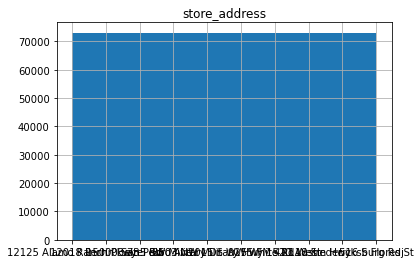

12125 Alamo Ranch Pkwy     73050
12018 Perrin Beitel Rd     73050
15000 San Pedro Ave        73050
735 SW Military Dr         73050
8503 NW Military Hwy       73050
1015 S WW White Rd         73050
9255 FM 471 West           73050
1520 Austin Hwy            73050
2118 Fredericksburg Rdj    73050
516 S Flores St            73050
Name: store_address, dtype: int64
12125 Alamo Ranch Pkwy     10.0
12018 Perrin Beitel Rd     10.0
15000 San Pedro Ave        10.0
735 SW Military Dr         10.0
8503 NW Military Hwy       10.0
1015 S WW White Rd         10.0
9255 FM 471 West           10.0
1520 Austin Hwy            10.0
2118 Fredericksburg Rdj    10.0
516 S Flores St            10.0
Name: store_address, dtype: float64


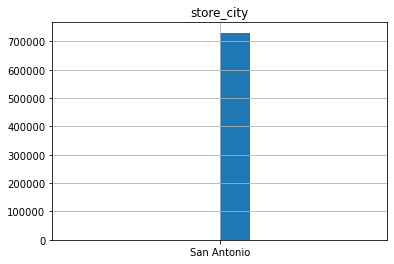

San Antonio    730500
Name: store_city, dtype: int64
San Antonio    100.0
Name: store_city, dtype: float64


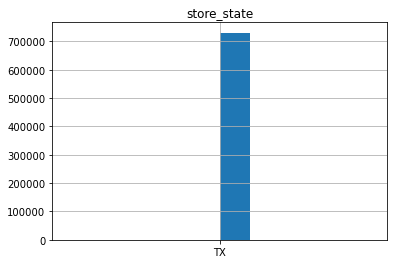

TX    730500
Name: store_state, dtype: int64
TX    100.0
Name: store_state, dtype: float64


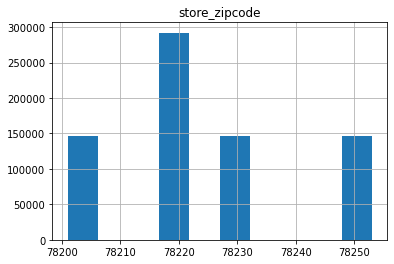

78253    73050
78217    73050
78232    73050
78221    73050
78231    73050
78220    73050
78251    73050
78218    73050
78201    73050
78204    73050
Name: store_zipcode, dtype: int64
78253    10.0
78217    10.0
78232    10.0
78221    10.0
78231    10.0
78220    10.0
78251    10.0
78218    10.0
78201    10.0
78204    10.0
Name: store_zipcode, dtype: float64


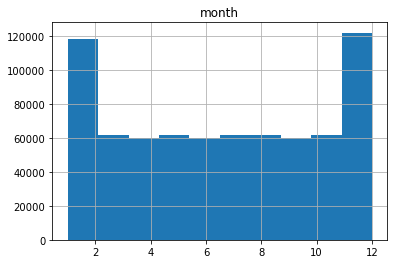

1     62000
3     62000
5     62000
7     62000
8     62000
10    62000
12    62000
4     60000
6     60000
9     60000
11    60000
2     56500
Name: month, dtype: int64
1     8.487337
3     8.487337
5     8.487337
7     8.487337
8     8.487337
10    8.487337
12    8.487337
4     8.213552
6     8.213552
9     8.213552
11    8.213552
2     7.734428
Name: month, dtype: float64


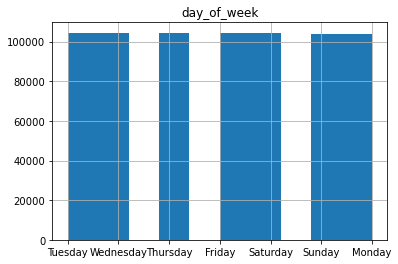

Tuesday      104500
Wednesday    104500
Thursday     104500
Friday       104500
Saturday     104500
Sunday       104000
Monday       104000
Name: day_of_week, dtype: int64
Tuesday      14.305270
Wednesday    14.305270
Thursday     14.305270
Friday       14.305270
Saturday     14.305270
Sunday       14.236824
Monday       14.236824
Name: day_of_week, dtype: float64


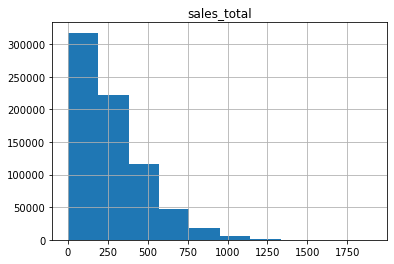

41.76      1255
16.80      1218
12.60      1136
52.20       954
80.19       950
           ... 
711.03        1
1279.95       1
736.92        1
605.22        1
442.68        1
Name: sales_total, Length: 5096, dtype: int64
41.76      0.171800
16.80      0.166735
12.60      0.155510
52.20      0.130595
80.19      0.130048
             ...   
711.03     0.000137
1279.95    0.000137
736.92     0.000137
605.22     0.000137
442.68     0.000137
Name: sales_total, Length: 5096, dtype: float64


In [8]:
for col in train.columns:
    train[col].hist().plot()
    plt.title(col)
    plt.show()
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)

In [9]:
y = train.sales_total

[Text(0.5, 1.0, 'Sale Total by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Total Sales')]

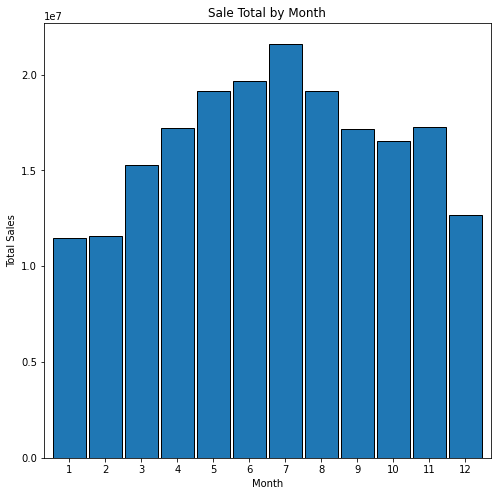

In [10]:
ax = y.groupby(y.index.month).sum().plot.bar(width=.9, ec='black', figsize=(8, 8))
plt.xticks(rotation=0)
ax.set(title='Sale Total by Month', xlabel='Month', ylabel='Total Sales')

In [11]:
y.groupby(y.index.month).sum()

sale_date
1     11484434.21
2     11582597.34
3     15295050.28
4     17187834.81
5     19153826.08
6     19685904.91
7     21612915.35
8     19115838.29
9     17175156.90
10    16539930.82
11    17265679.43
12    12664458.58
Name: sales_total, dtype: float64

[Text(0.5, 1.0, 'Average Sale Total by Weekday'),
 Text(0.5, 0, 'Weekday'),
 Text(0, 0.5, 'Total Sales')]

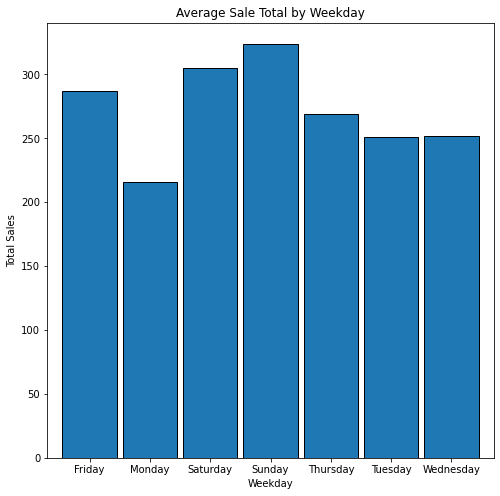

In [12]:
ax = y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black', figsize=(8, 8))
plt.xticks(rotation=0)
ax.set(title='Average Sale Total by Weekday', xlabel='Weekday', ylabel='Total Sales')

<AxesSubplot:xlabel='sale_date'>

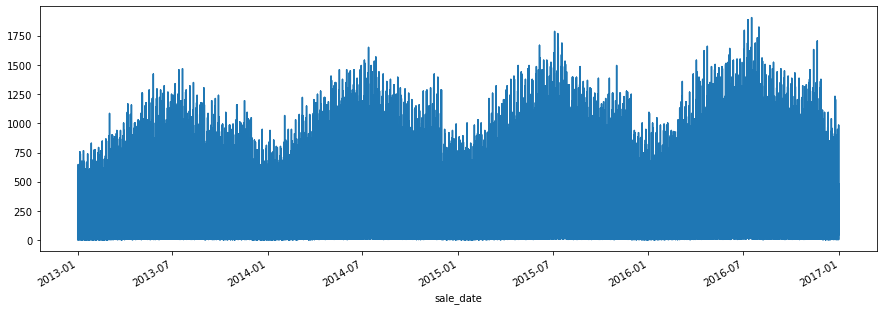

In [13]:
y.plot(figsize=(15, 5))

<AxesSubplot:title={'center':'1 Month average'}, xlabel='sale_date'>

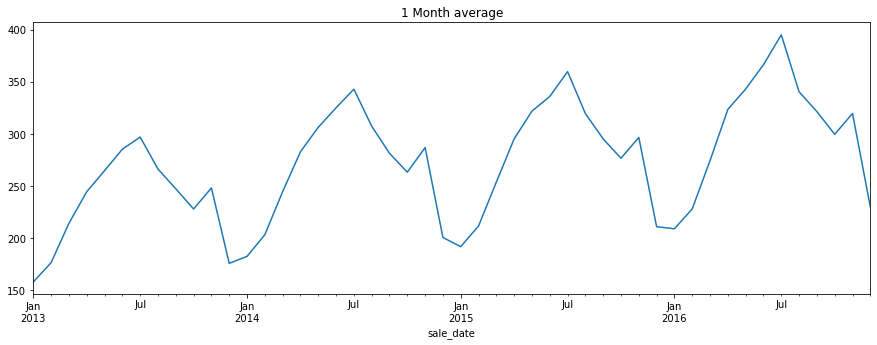

In [14]:
y.resample('1M').mean().plot(title='1 Month average', figsize=(15, 5))


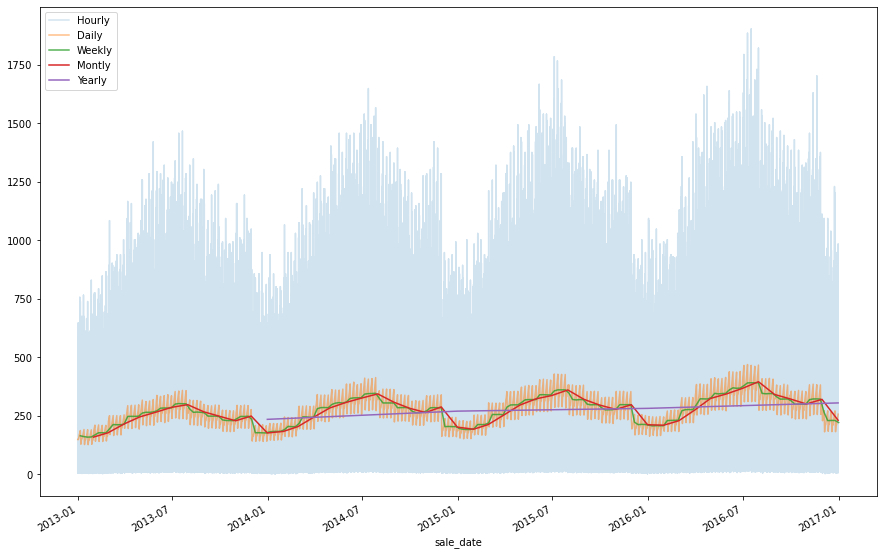

In [15]:
y.plot(alpha=.2, label='Hourly', figsize=(15, 10))
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

<AxesSubplot:title={'center':'Average year-to-year change in sales'}, xlabel='sale_date'>

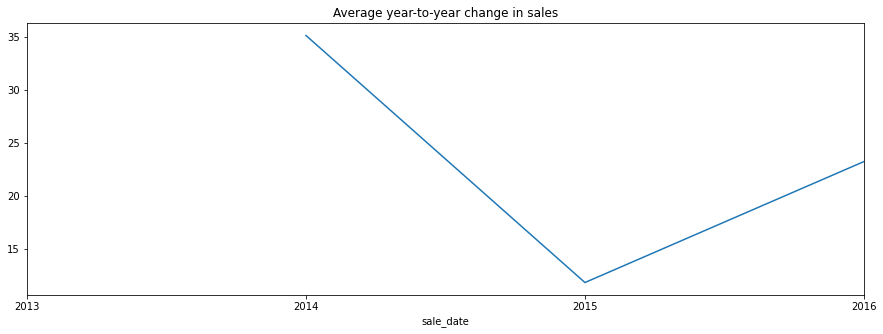

In [16]:
y.resample('Y').mean().diff().plot(title='Average year-to-year change in sales', figsize=(15, 5))


<AxesSubplot:title={'center':'Average month-to-month change in sales'}, xlabel='sale_date'>

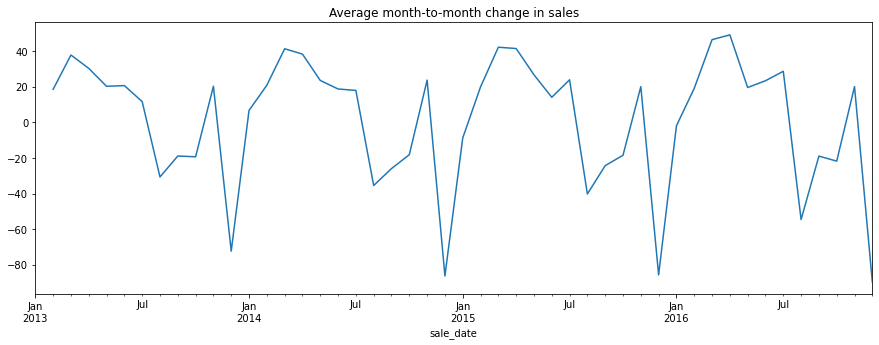

In [17]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in sales', figsize=(15, 5))


<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

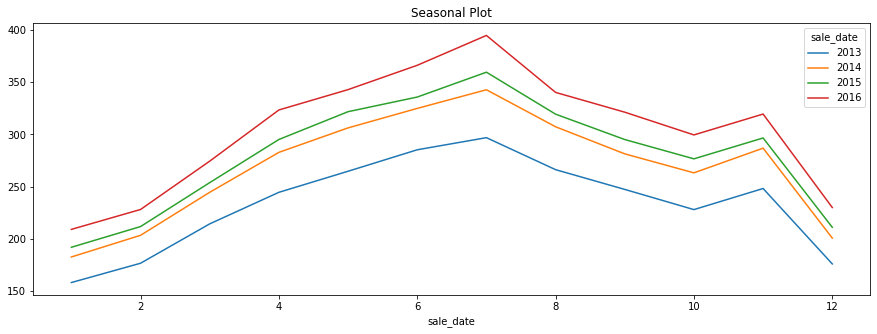

In [18]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot', figsize=(15, 5))

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

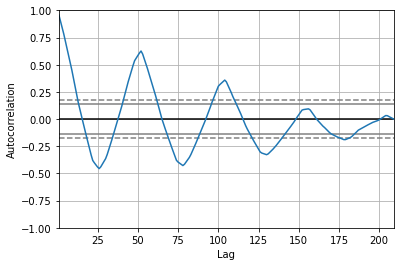

In [19]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())


In [20]:
y = train.sales_total.resample('M').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-31,157.894723,NaN,-78.976036,NaN
2013-02-28,176.411855,NaN,-61.455107,NaN
2013-03-31,214.181650,NaN,-20.240061,NaN
2013-04-30,244.460082,NaN,20.668944,NaN
2013-05-31,264.663123,NaN,41.905810,NaN


<AxesSubplot:xlabel='sale_date'>

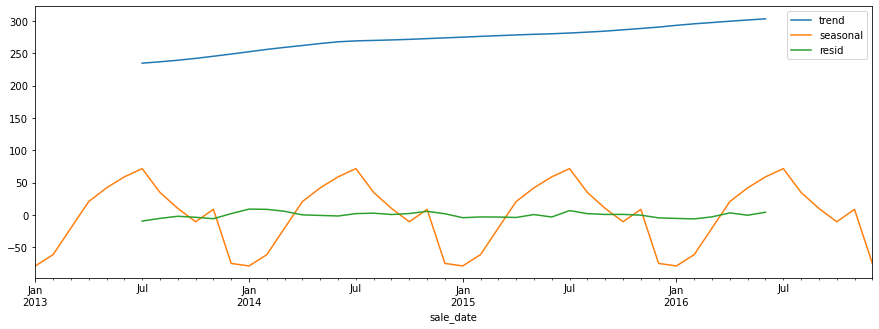

In [21]:
decomposition.iloc[:, 1:].plot(figsize=(15,5))


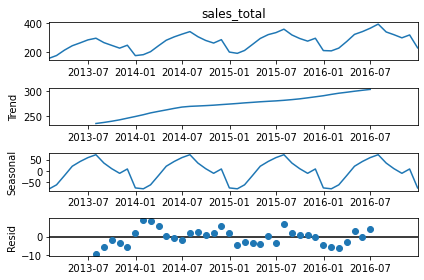

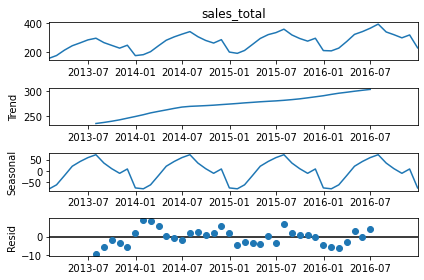

In [22]:
result.plot()


## opsd dataset

In [23]:
df = prepare.prepare_df()

In [24]:
df.head(1)

,Consumption,Wind,Solar,Wind+Solar,year,month
Date,,,,,,
2006-01-01,1069.184,48.709,6.587,234.052,2006,1


In [25]:
print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

Date Range: 2006-01-01 00:00:00 to 2017-12-31 00:00:00
Shape: (4383, 6)


In [27]:
train = df[:'2015'] # includes 2015
test = df['2016':'2017']

In [28]:
print('Train Shape:', train.shape)
print('Test Shape:', test.shape)

Train Shape: (3652, 6)
Test Shape: (731, 6)


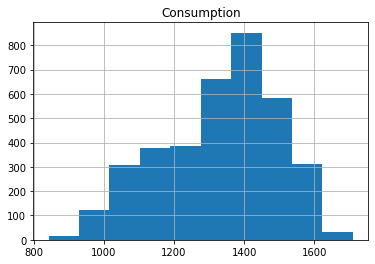

1103.823    2
1350.439    2
1383.504    2
1348.188    2
1246.850    2
           ..
1368.857    1
1279.065    1
1265.691    1
1047.747    1
1158.103    1
Name: Consumption, Length: 3645, dtype: int64
1103.823    0.054765
1350.439    0.054765
1383.504    0.054765
1348.188    0.054765
1246.850    0.054765
              ...   
1368.857    0.027382
1279.065    0.027382
1265.691    0.027382
1047.747    0.027382
1158.103    0.027382
Name: Consumption, Length: 3645, dtype: float64


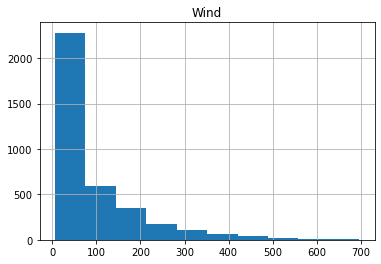

48.709     1462
96.107        2
421.130       2
113.199       2
34.973        2
           ... 
153.273       1
259.368       1
299.176       1
271.457       1
358.330       1
Name: Wind, Length: 2184, dtype: int64
48.709     40.032859
96.107      0.054765
421.130     0.054765
113.199     0.054765
34.973      0.054765
             ...    
153.273     0.027382
259.368     0.027382
299.176     0.027382
271.457     0.027382
358.330     0.027382
Name: Wind, Length: 2184, dtype: float64


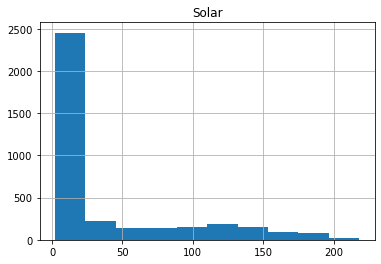

6.587      2192
64.355        3
121.595       3
85.920        2
102.679       1
           ... 
134.309       1
93.325        1
87.743        1
93.400        1
20.226        1
Name: Solar, Length: 1456, dtype: int64
6.587      60.021906
64.355      0.082147
121.595     0.082147
85.920      0.054765
102.679     0.027382
             ...    
134.309     0.027382
93.325      0.027382
87.743      0.027382
93.400      0.027382
20.226      0.027382
Name: Solar, Length: 1456, dtype: float64


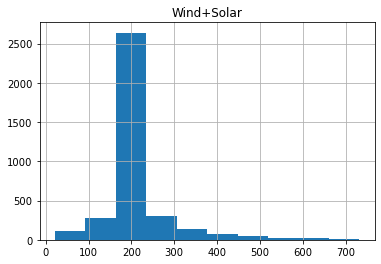

234.052    2192
102.324       3
231.651       3
187.626       2
251.929       2
           ... 
142.446       1
169.054       1
192.031       1
170.107       1
378.556       1
Name: Wind+Solar, Length: 1455, dtype: int64
234.052    60.021906
102.324     0.082147
231.651     0.082147
187.626     0.054765
251.929     0.054765
             ...    
142.446     0.027382
169.054     0.027382
192.031     0.027382
170.107     0.027382
378.556     0.027382
Name: Wind+Solar, Length: 1455, dtype: float64


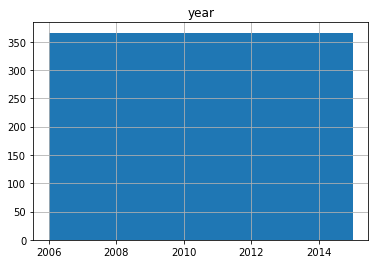

2008    366
2012    366
2006    365
2007    365
2009    365
2010    365
2011    365
2013    365
2014    365
2015    365
Name: year, dtype: int64
2008    10.021906
2012    10.021906
2006     9.994524
2007     9.994524
2009     9.994524
2010     9.994524
2011     9.994524
2013     9.994524
2014     9.994524
2015     9.994524
Name: year, dtype: float64


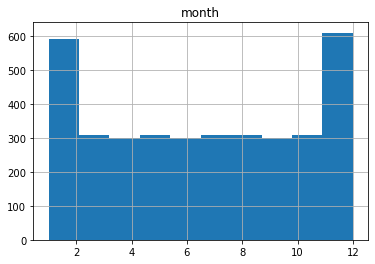

1     310
3     310
5     310
7     310
8     310
10    310
12    310
4     300
6     300
9     300
11    300
2     282
Name: month, dtype: int64
1     8.488499
3     8.488499
5     8.488499
7     8.488499
8     8.488499
10    8.488499
12    8.488499
4     8.214677
6     8.214677
9     8.214677
11    8.214677
2     7.721796
Name: month, dtype: float64


In [29]:
for col in train.columns:
    train[col].hist().plot()
    plt.title(col)
    plt.show()
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)

In [30]:
y = train.Consumption

[Text(0.5, 1.0, 'Consumption by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Consumption')]

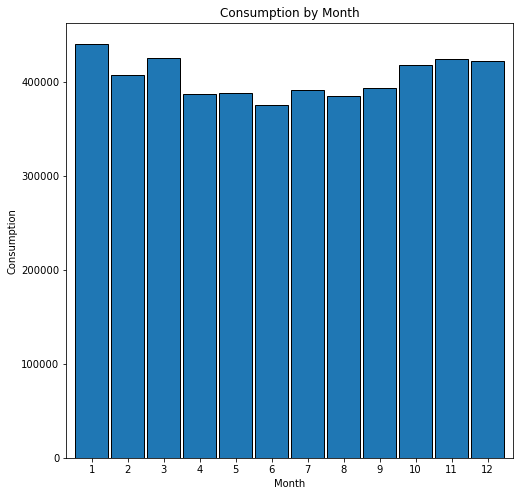

In [31]:
ax = y.groupby(y.index.month).sum().plot.bar(width=.9, ec='black', figsize=(8, 8))
plt.xticks(rotation=0)
ax.set(title='Consumption by Month', xlabel='Month', ylabel='Consumption')

In [32]:
y.groupby(y.index.month).sum()

Date
1     440597.138
2     407378.279
3     425157.386
4     386614.725
5     388086.303
6     375662.162
7     390876.360
8     384865.393
9     393063.957
10    417988.389
11    424366.962
12    422095.410
Name: Consumption, dtype: float64

[Text(0.5, 1.0, 'Average Consumption by Weekday'),
 Text(0.5, 0, 'Weekday'),
 Text(0, 0.5, 'Consumption')]

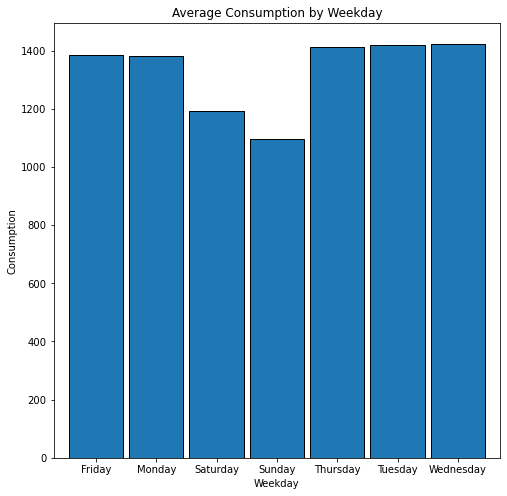

In [33]:
ax = y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black', figsize=(8, 8))
plt.xticks(rotation=0)
ax.set(title='Average Consumption by Weekday', xlabel='Weekday', ylabel='Consumption')

<AxesSubplot:xlabel='Date'>

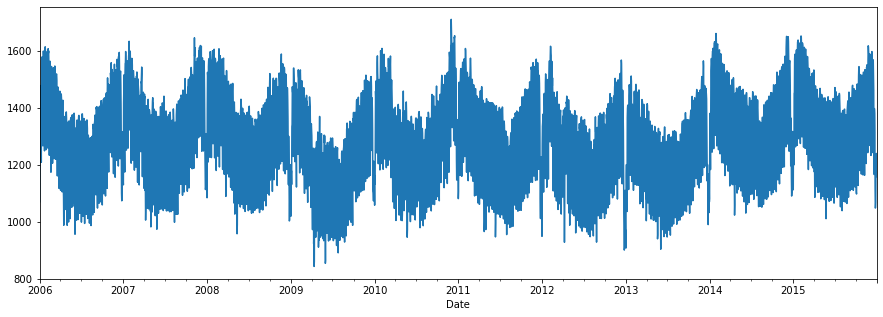

In [34]:
y.plot(figsize=(15, 5))

<AxesSubplot:title={'center':'1 Month average'}, xlabel='Date'>

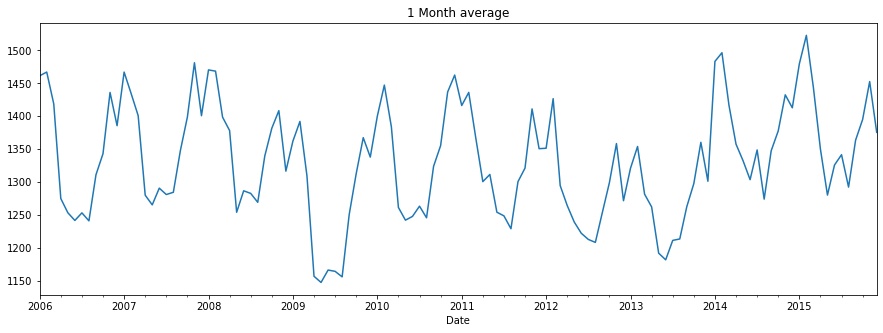

In [35]:
y.resample('1M').mean().plot(title='1 Month average', figsize=(15, 5))


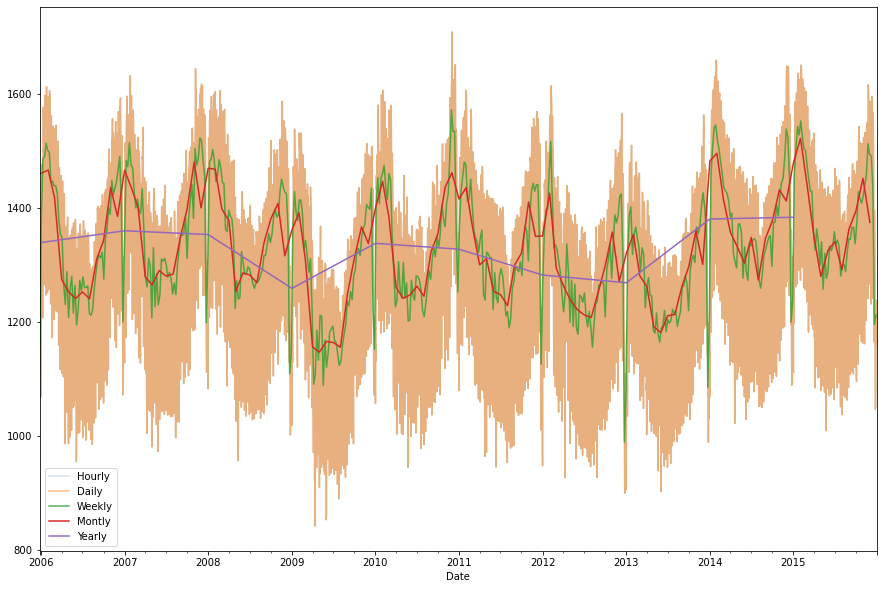

In [36]:
y.plot(alpha=.2, label='Hourly', figsize=(15, 10))
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

<AxesSubplot:title={'center':'Average year-to-year change in Consumption'}, xlabel='Date'>

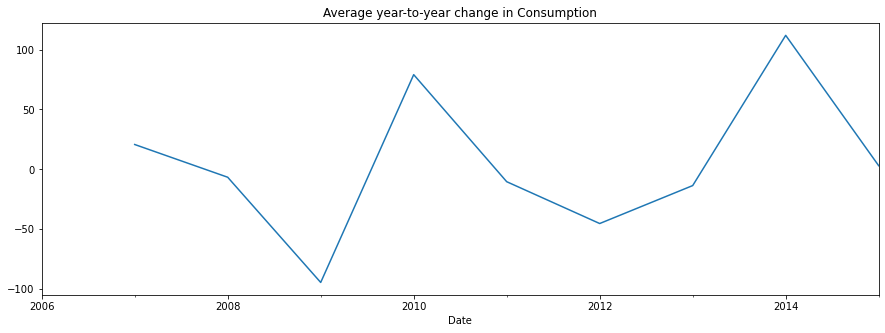

In [37]:
y.resample('Y').mean().diff().plot(title='Average year-to-year change in Consumption', figsize=(15, 5))


<AxesSubplot:title={'center':'Average month-to-month change in Consumption'}, xlabel='Date'>

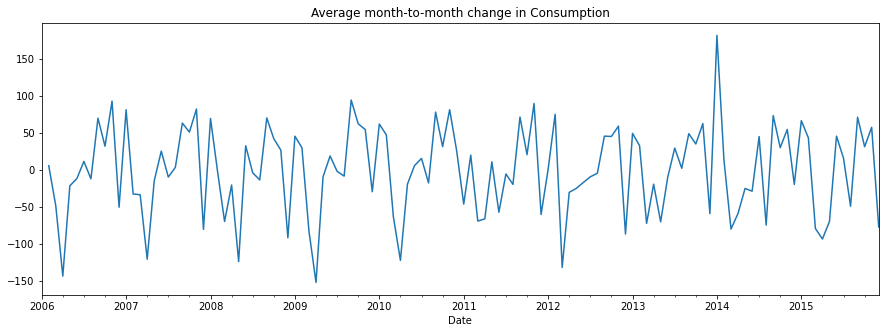

In [38]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in Consumption', figsize=(15, 5))


<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='Date'>

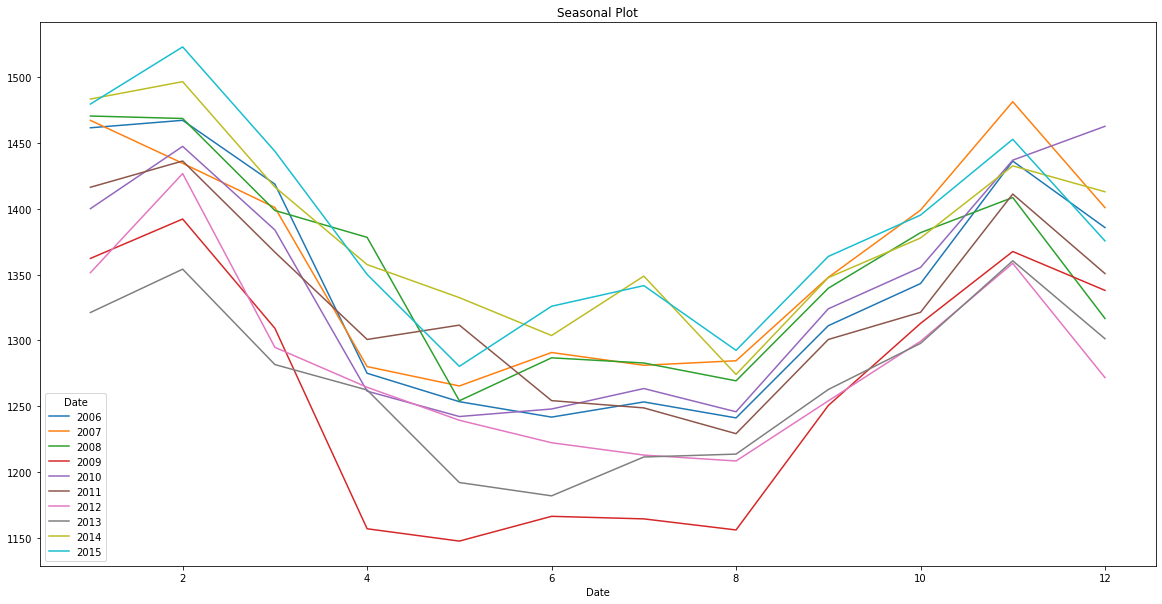

In [40]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot', figsize=(20, 10))

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

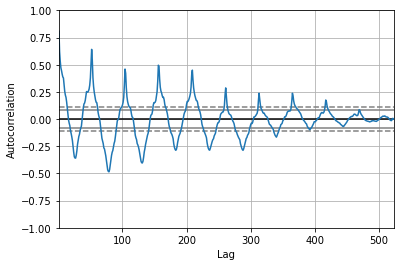

In [41]:
pd.plotting.autocorrelation_plot(train.Consumption.resample('W').mean())


In [42]:
y = train.Consumption.resample('M').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
Date,,,,
2006-01-31,1461.442065,NaN,89.281365,NaN
2006-02-28,1467.106893,NaN,113.896299,NaN
2006-03-31,1418.649161,NaN,37.569597,NaN
2006-04-30,1275.058900,NaN,-38.915070,NaN
2006-05-31,1253.488484,NaN,-77.751511,NaN


<AxesSubplot:xlabel='Date'>

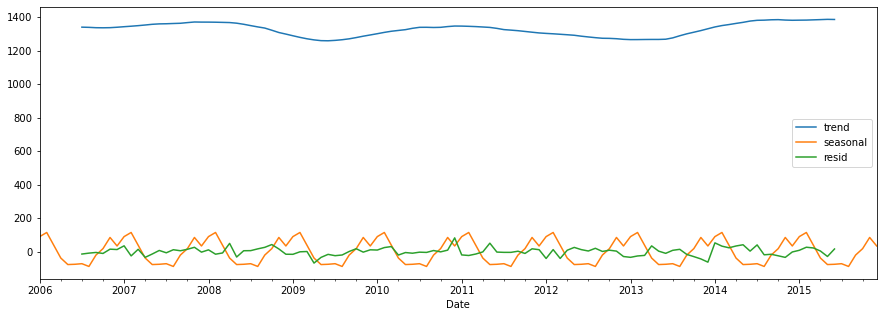

In [43]:
decomposition.iloc[:, 1:].plot(figsize=(15,5))


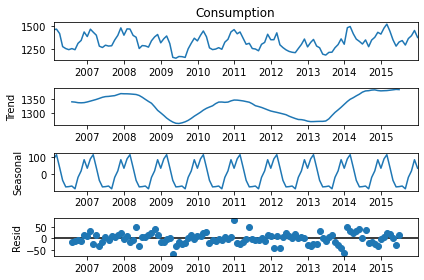

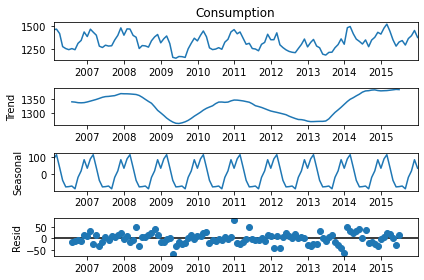

In [44]:
result.plot()
